<a href="https://colab.research.google.com/github/mohanrajmit/Bird-Classification-using-CNN/blob/master/bird.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization


Using TensorFlow backend.


In [2]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR10 has ten types of images labeled from 0 to 9. We only care about birds, which are labeled as class #2.
# So we'll cheat and change the Y values. Instead of each class being labeled from 0 to 9, we'll set it to True
# if it's a bird and False if it's not a bird.
y_train = (y_train == 2).astype(int)
y_test = (y_test == 2).astype(int)

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
# Normalize image data (pixel values from 0 to 255) to the 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
from keras.layers import Input
from keras.models import Model
ip = Input(shape=(32, 32, 3))
conv1 = Conv2D(32, (3, 3), padding='same', activation="relu")(ip)
conv2 = Conv2D(32, (3, 3), activation="relu") (conv1)
max1 = MaxPooling2D(pool_size=(2, 2))(conv2)


conv3 = Conv2D(64, (3, 3), padding='same', activation="relu")(max1)
conv4 = Conv2D(64, (3, 3), activation="relu")(conv3)
max2 = MaxPooling2D(pool_size=(2, 2))(conv4)


flat = Flatten()(max2)
dense1 = Dense(512, activation="relu")(flat)
res = Dense(1, activation="sigmoid")(dense1)


In [0]:
model_non_local = Model(inputs=ip, outputs=res)

In [6]:
model_non_local.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
model_non_local.fit(x_train,y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model_non_local.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])




Train on 50000 samples, validate on 10000 samples
Epoch 1/10





50000/50000 [==============================] - 29s 571us/step - loss: 0.2787 - acc: 0.9008 - val_loss: 0.2491 - val_acc: 0.9063
Epoch 2/10
50000/50000 [==============================] - 20s 391us/step - loss: 0.2317 - acc: 0.9127 - val_loss: 0.2161 - val_acc: 0.9185
Epoch 3/10
50000/50000 [==============================] - 20s 395us/step - loss: 0.2050 - acc: 0.9223 - val_loss: 0.2051 - val_acc: 0.9229
Epoch 4/10
50000/50000 [==============================] - 20s 394us/step - loss: 0.1812 - acc: 0.9311 - val_loss: 0.2017 - val_acc: 0.9214
Epoch 5/10
50000/50000 [==============================] - 20s 395us/step - loss: 0.1567 - acc: 0.9404 - val_loss: 0.2089 - val_acc: 0.9188
Epoch 6/10
50000/50000 [==============================] - 20s 391us/step - loss: 0.1327 - acc: 0.9497 - val_loss: 0.2046 - val_acc: 0.9329
Epoch 7/10
50000/50000 [==============================] - 20s 392us/step - loss: 0.1067 - acc: 0.9584 - val_

In [8]:
# Create a model and add layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy']
)



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# Train the model
model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(x_test, y_test),
    shuffle=True
)

# Save the trained model to a file so we can use it to make predictions later
model.save("bird_model.h5")

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 25s 496us/step - loss: 0.3199 - acc: 0.8931 - val_loss: 0.2983 - val_acc: 0.9003
Epoch 2/10
50000/50000 [==============================] - 23s 468us/step - loss: 0.2556 - acc: 0.9057 - val_loss: 0.2949 - val_acc: 0.9048
Epoch 3/10
50000/50000 [==============================] - 23s 468us/step - loss: 0.2360 - acc: 0.9103 - val_loss: 0.2326 - val_acc: 0.9096
Epoch 4/10
50000/50000 [==============================] - 23s 465us/step - loss: 0.2216 - acc: 0.9167 - val_loss: 0.3290 - val_acc: 0.9073
Epoch 5/10
50000/50000 [==============================] - 24s 471us/step - loss: 0.2097 - acc: 0.9204 - val_loss: 0.2704 - val_acc: 0.9100
Epoch 6/10
50000/50000 [==============================] - 23s 469us/step - loss: 0.1976 - acc: 0.9256 - val_loss: 0.2276 - val_acc: 0.9228
Epoch 7/10
50000/50000 [==============================] - 23s 464us/step - loss: 0.1863 - acc: 0.9285 - val_loss: 0.

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model

In [11]:
# Load the model we trained
model = load_model('bird_model.h5')
predictions = model.predict(x_test, batch_size=32, verbose=1)

# If the model is more than 50% sure the object is a bird, call it a bird.
# Otherwise, call it "not a bird".
predictions = predictions > 0.5

# Calculate how many mis-classifications the model makes
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Calculate Precision and Recall for each class
report = classification_report(y_test, predictions)
print(report)

10000/10000 [==============================] - 1s 148us/step
True Positives: 478
True Negatives: 8874
False Positives: 126
False Negatives: 522
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      9000
           1       0.79      0.48      0.60      1000

    accuracy                           0.94     10000
   macro avg       0.87      0.73      0.78     10000
weighted avg       0.93      0.94      0.93     10000



In [12]:
for i,pred in enumerate(predictions):
  if pred>0.5:
    print(i,pred)
    print("bird")

67 [ True]
bird
75 [ True]
bird
84 [ True]
bird
86 [ True]
bird
113 [ True]
bird
116 [ True]
bird
123 [ True]
bird
138 [ True]
bird
156 [ True]
bird
219 [ True]
bird
226 [ True]
bird
248 [ True]
bird
254 [ True]
bird
270 [ True]
bird
291 [ True]
bird
303 [ True]
bird
307 [ True]
bird
322 [ True]
bird
323 [ True]
bird
342 [ True]
bird
353 [ True]
bird
357 [ True]
bird
374 [ True]
bird
387 [ True]
bird
388 [ True]
bird
391 [ True]
bird
409 [ True]
bird
424 [ True]
bird
437 [ True]
bird
448 [ True]
bird
498 [ True]
bird
537 [ True]
bird
548 [ True]
bird
559 [ True]
bird
564 [ True]
bird
592 [ True]
bird
603 [ True]
bird
618 [ True]
bird
631 [ True]
bird
672 [ True]
bird
675 [ True]
bird
691 [ True]
bird
697 [ True]
bird
706 [ True]
bird
731 [ True]
bird
748 [ True]
bird
754 [ True]
bird
758 [ True]
bird
765 [ True]
bird
808 [ True]
bird
810 [ True]
bird
813 [ True]
bird
821 [ True]
bird
832 [ True]
bird
833 [ True]
bird
839 [ True]
bird
843 [ True]
bird
877 [ True]
bird
931 [ True]
bird
9

bird


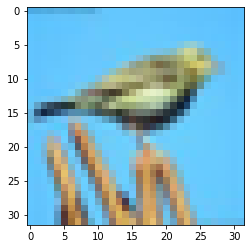

In [15]:
import numpy as np
import matplotlib.pyplot as plt
#img=cv2.imread("Image-Read/animals/dogs/dogs_00018.jpg")
#img2=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
#img1=img2.flatten()
#img1=img1.reshape(-1,1)
# insert a new axis along the row
sample_test_image = x_test[67]
b = np.expand_dims(sample_test_image, axis=0)
res=model.predict(b)
#print(label_name[int(res)])

plt.imshow(sample_test_image)

if res > 0.5:
  print("bird")
else:
  print("not bird")